# Network Comparison

## Standard deviation of Validation Accuracy and Loss

In [5]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion MNIST',
    'cifar10': 'CIFAR10',
    'imdb': 'IMDB',
    'lenet': 'LeNet',
    'lstm': 'LSTM'
}

    
def show(dataset_name, model_name):
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.suptitle(f'{names[dataset_name]} {names[model_name]}', fontsize=18, y=1.02)
    ax1.set_title('Standard Deviation of Validation Accuracy')
    ax2.set_title('Standard Deviation of Validation Loss')
    fig.text(0.5, 0, 'epoch', ha='center', fontsize=12)
    
    def get_data(metrics):
        data = {}
        dir_paths = glob(f'../data/{dataset_name}_{model_name}_*')
        dir_paths.sort()
        for dir_path in dir_paths:
            optimizer_name = re.search(r'../data/.+_.+_(.+)', dir_path).group(1)
            temp = []
            for path in glob(f'{dir_path}/*/result.csv'):
                with open(path) as f:
                    rows = np.array([row for row in csv.reader(f)])
                idx = np.where(rows[0] == metrics)[0]
                row = rows[1:, idx]
                row = row.reshape(len(row))
                row = row.astype(np.float)
                temp.append(row)
            data[optimizer_name] = [np.std(t) for t in np.array(temp).transpose()]
        return data
    
    acc_data = get_data('val_accuracy')
    loss_data = get_data('val_loss')
    
    max_y = 0
    min_y = np.inf
    for optimizer_name, y in acc_data.items():
        max_y = max(y[5:]) if max(y[5:]) > max_y else max_y
        min_y = min(y[5:]) if min(y[5:]) < min_y else min_y
        x = np.arange(0, len(y), 1)
        ax1.plot(x, y, label=optimizer_name)
    d = (max_y - min_y) / 10
    ax1.set_ylim(min_y - d, max_y + d)
    
    max_y = 0
    min_y = np.inf
    for optimizer_name, y in loss_data.items():
        max_y = max(y[5:]) if max(y[5:]) > max_y else max_y
        min_y = min(y[5:]) if min(y[5:]) < min_y else min_y
        x = np.arange(0, len(y), 1)
        ax2.plot(x, y, label=optimizer_name)
    d = (max_y - min_y) / 10
    ax2.set_ylim(min_y - d, max_y + d)
    
    plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=1)
    plt.show()

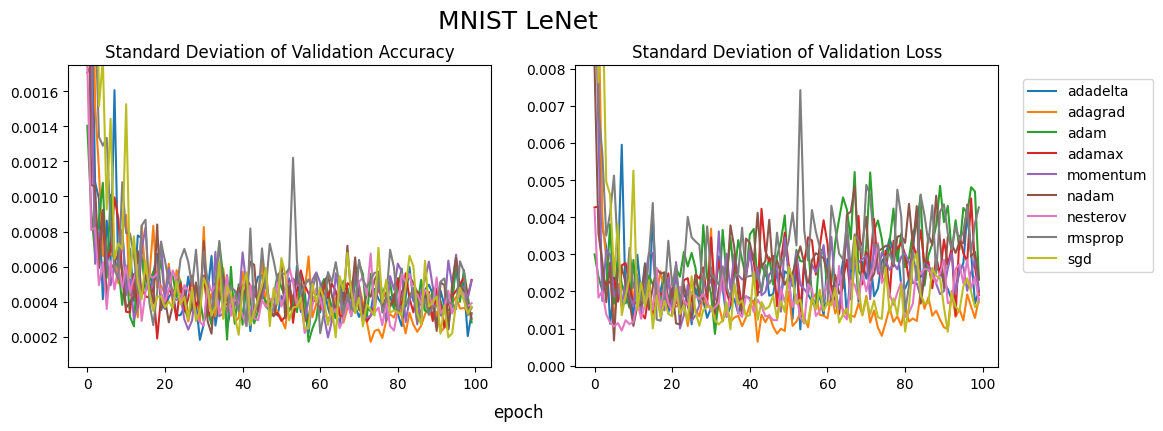

In [6]:
show('mnist', 'lenet')

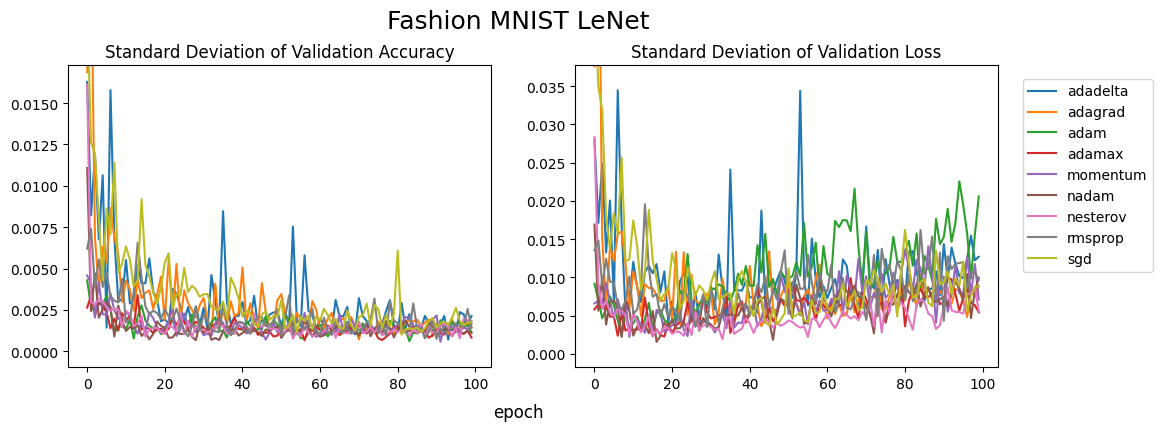

In [7]:
show('fashion_mnist', 'lenet')

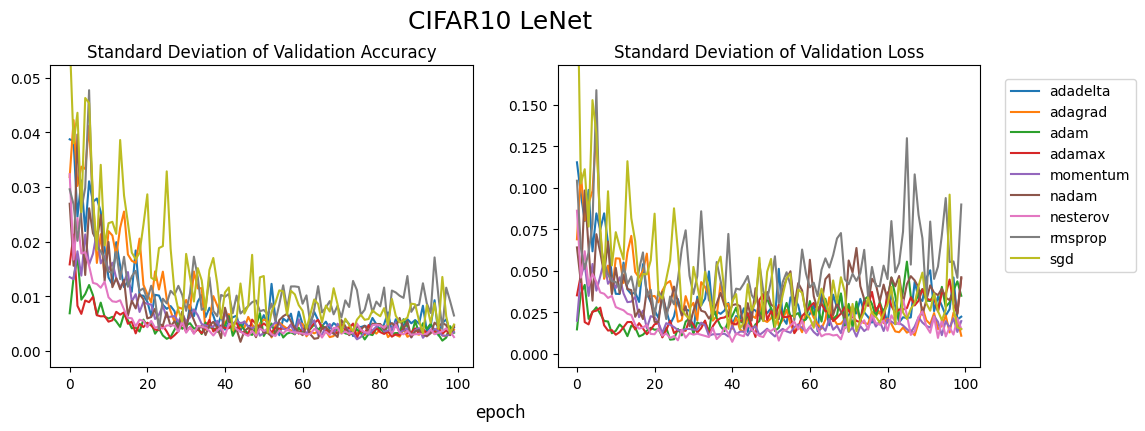

In [8]:
show('cifar10', 'lenet')

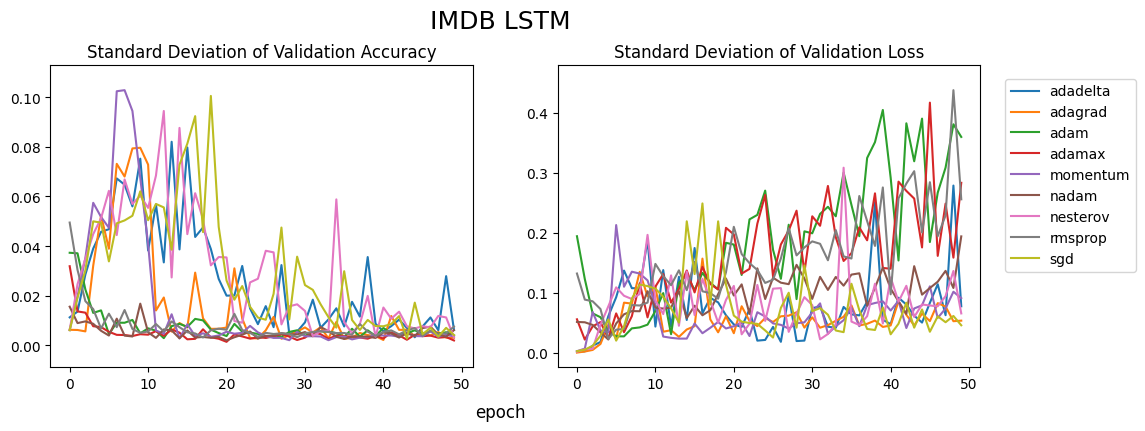

In [9]:
show('imdb', 'lstm')